In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#following parameter choices for the investor's utility function:
Lambda = 2
Gamma = 1
Delta = 0.99

In [3]:
# Simulate 𝜺 with 10^4 random draws from a standard normal distribution
mu, sigma = 0, 1 # mean and standard deviation
error = np.random.normal(mu, sigma, 10**4)
error

array([-1.40302387,  1.00577036,  1.12115461, ..., -0.1582558 ,
       -0.96479669,  0.68423709])

In [4]:
#Consumption growth has a lognormal distribution
#calculate consumption growth "g"
ln_g = 0.02 + 0.02*error
g = np.exp(ln_g)
g

array([0.99197192, 1.0409309 , 1.04333581, ..., 1.01697739, 1.00070431,
       1.0342585 ])

In [5]:
# Based on Formula Rf = E[g]**Gamma / Delta
Rf = (g.mean()**Gamma)/Delta
Rf

1.0308319535786281

In [6]:
# define formula 
def f(x):
    Utility_list = [] 
    R = x*g  #calculate every x times g to get Rt+1
    for i in R:
        if i >=Rf:
            Utility_list.append(i-Rf)
        else:
            Utility_list.append(Lambda*(i-Rf))

    Utility_array = np.array(Utility_list) # change to numpy array, so we can get the mean/expectation
    Expected_utility = Utility_array.mean()
    
    return Delta*b0*Expected_utility + Delta*x - 1

In [7]:
#define bisection search function
def bisection(a, b, tol):
    x_left = a
    x_right = b
    while (np.abs(x_left - x_right) >= tol):
        x_center = (x_left + x_right)/2
        prod = f(x_left) * f(x_center)
        if prod > 0:
            x_left = x_center
        else:
            if prod < tol:
                x_right = x_center
    return x_center

In [8]:
# calculate k value for bo from [0,10] at step of 0.1
k = []
for b0 in np.arange(0, 10.1, 0.1):
    answer = bisection(1,1.1,1e-5)
    k.append(answer)
k = np.array(k)

In [9]:
#calculate price divident ratio
price_dividend_ratio = 1 / (k-1)

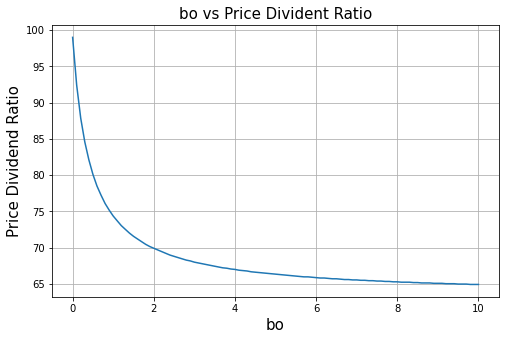

In [10]:
b0 = np.arange(0,10.1,0.1)

plt.figure(figsize = (8,5))

plt.plot(b0,price_dividend_ratio)

plt.title("bo vs Price Divident Ratio", fontsize = "15")
plt.xlabel("bo", fontsize = "15")
plt.ylabel("Price Dividend Ratio", fontsize = "15")
plt.grid()
plt.show()

In [11]:
#Calculate Market Risk Premium
Mkt_Risk_Premium = []

for i in np.arange(len(k)):
    premium = k[i]*g.mean() - Rf
    Mkt_Risk_Premium.append(premium)

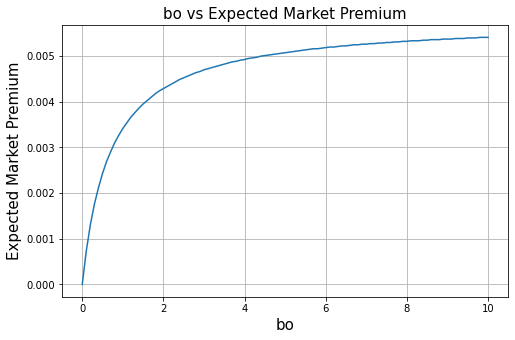

In [12]:
b0 = np.arange(0,10.1,0.1)
plt.figure(figsize = (8,5))

plt.plot(b0,Mkt_Risk_Premium)

plt.title("bo vs Expected Market Premium", fontsize = "15")
plt.xlabel("bo", fontsize = "15")
plt.ylabel("Expected Market Premium", fontsize = "15")
plt.grid()
plt.show()

Briefly explain the economic significance of the investor's utility function for financial gain or loss [i.e., 𝜈(R)], as well as the economic significance of the parameters b0 and 𝜆.

`Investor's utility function for financial gain or loss [i.e., nuhat(R)]:`

nuhat(R) considered the impact of financial gain or loss to the expected utility. it allows us to incorporate the prospect theory, where financial gain or loss is measured relative to reference level based on risk-free rate


`Parameter lambda.`

Investor is more sensitive to financial loss than financial gain, and lambda is the degree of loss aversion, therefore lambda should always greater than 1. The bigger the lambda, The more sensitive the investors are towards financial losses.

`Parameter b0`

b0 determines amount of emphasis that investor puts on utility from financial gain or loss, compared to utility of consumption. Equity premium will increase as b0 become larger, because investors puts more emphasis in utility from financial gain or loss.
